# Evaluation of the Models

In [31]:
import torch
import numpy as np
import torchgadgets as tg
import os
from pathlib import Path as P
from tbparse import SummaryReader
import tensorboard
import matplotlib.pyplot as plt

In [134]:
num_iterations = 596
batch_size = 8
num_epochs = 10

def smooth_curve(f, K=5):
    """ Smoothing a function using a low-pass filter (mean) of size K """
    kernel = np.ones(K) / K
    f = np.concatenate([f[:int(K//2)], f, f[int(-K//2):]])  # to account for boundaries
    smooth_f = np.convolve(f, kernel, mode="same")
    smooth_f = smooth_f[K//2: -K//2]  # removing boundary-fixes
    return smooth_f



def visualize_training(train_loss, eval_loss, accuracy):
    plt.style.use('seaborn-v0_8')

    if len(eval_loss) == 11:
        xticks = range(0, (num_epochs+1)*num_iterations,num_iterations)
        ta = xticks
        tc = np.arange(0, num_epochs+1)
    else:
        xticks = range(num_iterations, (num_epochs+1)*num_iterations,num_iterations)
        ta = range(0, (num_epochs+1)*num_iterations,num_iterations)
        tc = np.arange(0, num_epochs+1)

    print(len(eval_loss))
    print(len(xticks))

    fig, ax = plt.subplots(1,2, figsize=(16,8))

    smooth_loss = smooth_curve(train_loss, 51)
    ax[0].plot(smooth_loss, label="Training Loss")
    ax[0].plot(xticks, eval_loss, label="Evaluation Loss")
    ax[0].grid(True)
    ax[0].set_xlabel("# Epoch")
    ax[0].set_ylabel("CrossEntropy Loss")
    ax[0].set_xticks(ta, tc)
    ax[0].legend()

    ax[1].plot(accuracy, label="Evaluation Accuracy")
    ax[1].grid(True)
    ax[1].set_yticks(np.arange(0.0, 1.1, 0.1).tolist())
    ax[1].set_xlabel("# Epoch")
    ax[1].set_ylabel("Accuracy")
    ax[1].grid(True)
    ax[1].set_ylim(0.0,1.0)
    ax[1].set_xticks([0,1,2,3,4,5,6,7,8,9,10])
    ax[1].legend()


    return fig



## RNN Model

In [3]:
exp_name = "rnn_model"
run_name = 'test_1'
log_dir = P(os.getcwd(), 'experiments', exp_name, run_name, 'logs')


## LSTM-Cell Model

In [4]:
exp_name = "lstm_cell"
run_name = 'test_1'
log_dir = P(os.getcwd(), 'experiments', exp_name, run_name, 'logs')


In [17]:
reader = SummaryReader(log_dir, pivot=True)
data = reader.scalars
data

,step,epoch_metrics/accuracy,epoch_metrics/eval_loss,epoch_metrics/evaluation/accuracy,epoch_metrics/evaluation/accuracy_top3,epoch_metrics/evaluation/f1,epoch_metrics/evaluation/precision,epoch_metrics/evaluation/recall,iteration_metrics/train_loss
0,0,0.22375,1.786381,0.16875,0.3825,0.048128,0.166667,0.028125,NaN
1,1,0.65125,0.708131,NaN,NaN,NaN,NaN,NaN,1.780055
2,2,0.66500,0.701196,NaN,NaN,NaN,NaN,NaN,1.76419
3,3,0.72375,0.702316,NaN,NaN,NaN,NaN,NaN,1.72882
4,4,0.71625,0.681950,NaN,NaN,NaN,NaN,NaN,1.697827
...,...,...,...,...,...,...,...,...,...
5911,5911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.201847
5912,5912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004422
5913,5913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.007677
5914,5914,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.383777


In [98]:
lstm_eval_loss = data.loc[:,'epoch_metrics/accuracy'].to_numpy()
lstm_accuracy = data.loc[:,'epoch_metrics/accuracy'].to_numpy()
lstm_loss = data.loc[:, 'iteration_metrics/train_loss'].to_numpy()

lstm_accuracy = lstm_accuracy[:num_epochs+1].astype(float).tolist()
lstm_eval_loss = lstm_eval_loss[:num_epochs+1].astype(float).tolist()
lstm_loss_2 = lstm_loss[1:]

lstm_loss = []


for i in lstm_loss_2:
    if isinstance(i, list):
        continue
    lstm_loss.append(float(i))



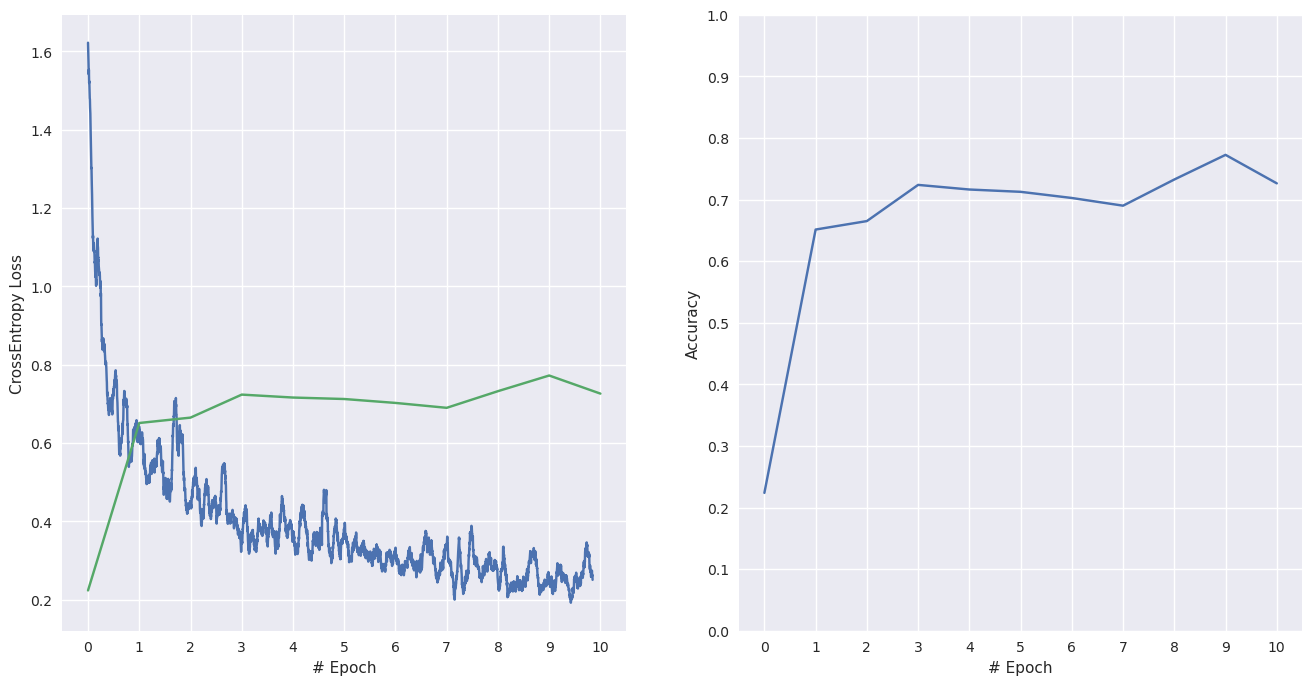

In [107]:
fig = visualize_training(lstm_loss, lstm_eval_loss, lstm_accuracy)
fig.show()

## GRU-Cell Model

###

In [130]:
exp_name = "gru_cell"
run_name = 'test_1'
log_dir = P(os.getcwd(), 'experiments', exp_name, run_name, 'logs')

reader = SummaryReader(log_dir, pivot=True)
data = reader.scalars
data

gru_eval_loss = data.loc[:,'epoch_metrics/accuracy'].to_numpy()
gru_accuracy = data.loc[:,'epoch_metrics/accuracy'].to_numpy()
gru_loss = data.loc[:, 'iteration_metrics/train_loss'].to_numpy()
gru_accuracy_2 = gru_eval_loss[:num_epochs+1]
gru_eval_loss_2 = gru_accuracy[:num_epochs+1]
gru_loss_2 = gru_loss[1:num_iterations*num_epochs]

gru_loss = []
gru_accuracy = []
gru_eval_loss = []


for i in gru_loss_2:
    if isinstance(i, list):
        continue
    gru_loss.append(float(i))

for i in gru_eval_loss_2:
    if isinstance(i, list):
        continue
    gru_eval_loss.append(float(i))

for i in gru_accuracy_2:
    if isinstance(i, list):
        continue
    gru_accuracy.append(float(i))


10
10


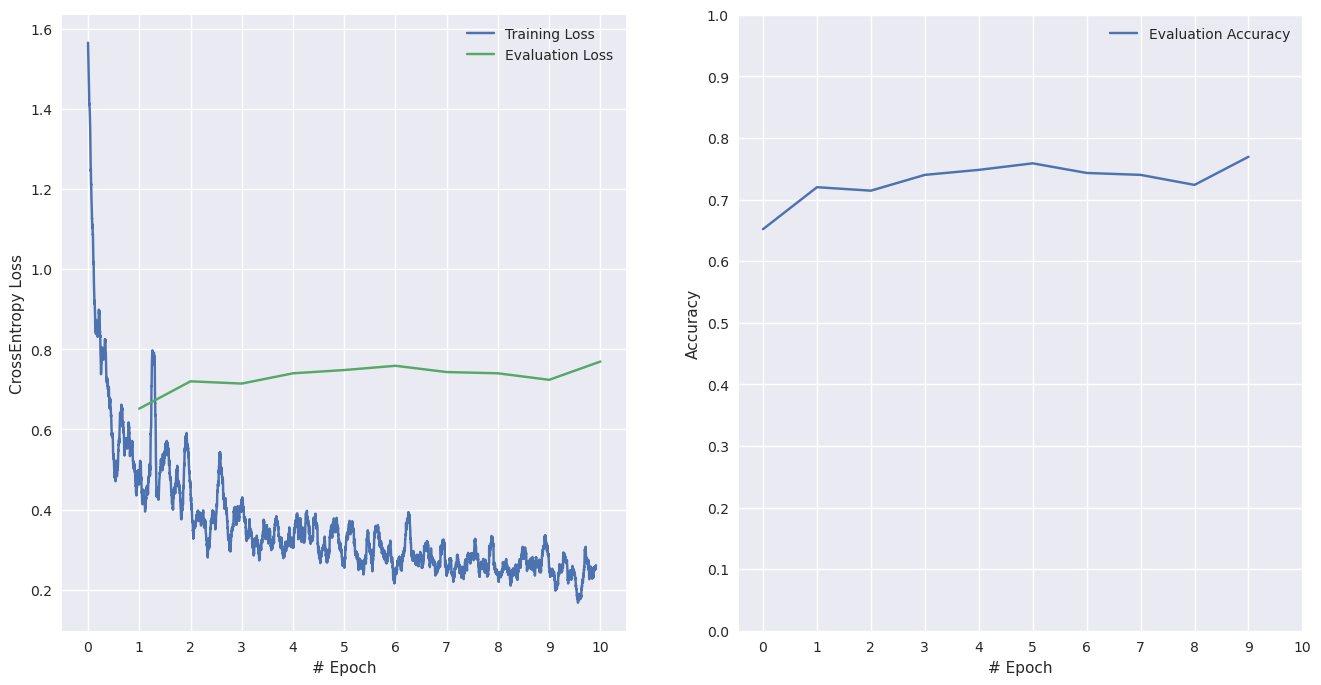

In [135]:
fig = visualize_training(gru_loss, gru_eval_loss, gru_accuracy)
fig.show()